## IMSA Training by Ekwacu Samuel (ekwacu@gmail.com)

# matplotlib + numpy + cartopy

*notebook by Maureen Ahiataku and Leif Denby*

`cartopy` is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps. To put geographical regions on the map `cartopy` includes at set of "features" (such as country boundaries, ocean, etc), but it is also possible to load your own regions using so-called "shape-files". These can be loaded with the `shapereader` function inside of `cartopy.io`.

Coordinate reference systems (CRS) are available in cartopy as `cartopy.crs` (and are inherited from proj4).


https://scitools.org.uk/cartopy/docs/latest/ 


<b> Objectives </b>
1. Read data from csv file to generate map using cartopy and add features such as land, lake, ocean etc.

2. Load a shapefile into cartopy maps

3. Use the default cartopy shapefiles

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader

from pathlib import Path

In [3]:
#data_path = Path("../data")
data_path = Path("C:/Users/7250/Desktop/IMSA_PYTHON_2023/")

# Plotting values at stations on a map

We will here create a plot where we can see for 22 synoptic weather stations across Ghana what the annual daily maximum rainfall (ADM) was for 2019. In addition we will be adding the adding the borders of administrative regions in Ghana.

In [4]:
drr = np.genfromtxt(data_path / "2019_ADM_rr.csv", delimiter=",", skip_header=1)

stn = drr[:, 0]
lat = drr[:, 1]
lon = drr[:, 2]
rr = drr[:, 3]

OSError: C:\Users\7250\Desktop\IMSA_PYTHON_2023\2019_ADM_rr.csv not found.

In [1]:
lon

NameError: name 'lon' is not defined

next we use `shapereader` to read in the "shape-file" for Ghana's administrative regions

In [6]:
shp_path = data_path / "GHA_adm_shp/gh_wgs16dregions/gh_wgs16dregions.shp"
adm1_shapes = list(shapereader.Reader(str(shp_path)).geometries())

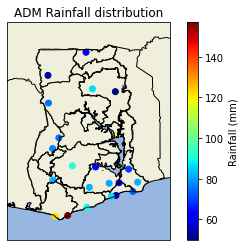

In [7]:
fig = plt.figure()
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())
# set the domain lat lon extent
ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
# and add country borders, ocean, land and lake borders from cartopy's set of features
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')

splot = ax.scatter(lon,lat,c=rr, cmap=cm.jet, alpha=1)
ax.set(title='ADM Rainfall distribution')
fig.colorbar(splot,label="Rainfall (mm)", orientation="vertical")


To set the station data in a wider context we will next be plotting a gridded dataset which is produced from GMET and the TAHMO (TAHMO Tropical Hydro-Meteorological Observatory data) observations stations. This gridded data is stored in at CSV file where the first columns are the latitutde and longitude, and the third column the precipitation the total rainfall for one week in March 2021.

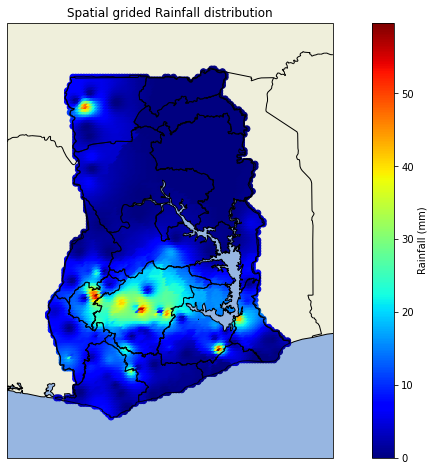

In [8]:
# read data

TA_rr = np.genfromtxt(
    data_path / "tahmo_1_7_Mar_2021_rr.csv", delimiter=",", skip_header=1
)
latt = TA_rr[:, 0:1]
lont = TA_rr[:, 1:2]
rrt = TA_rr[:, 2:3]

fig = plt.figure(figsize=(14, 8))
# set the cartopy projection
ax = fig.add_subplot(projection=ccrs.PlateCarree())
# set the domain based on the lon lat
ax.set_extent([-4, 2, 4, 12], ccrs.PlateCarree())

# this add the countries borders and shapefile
ax.add_geometries(
    adm1_shapes, ccrs.PlateCarree(), edgecolor="black", facecolor="none", alpha=0.8
)
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor="black")
ax.add_feature(cf.LAKES, edgecolor="black")

r = ax.scatter(x=lont, y=latt, c=rrt, cmap="jet")
ax.set(title="Spatial grided Rainfall distribution")
plt.colorbar(r, label="Rainfall (mm)", orientation="vertical")

# print(rr)

# Exercises

1. Read the `rr_temp_rh_24_30May21.csv`. The file contains gridded data, the columns describe `lat`: latitude and `lon`: longitude for each datapoint, `rr`: total rainfall, `tn` weekly-mean daily-minimum temperature, `tx`: weekly-mean daily-maximum temperature and `rh` mean relative humidity
2. Generate spatial map for rainfall, maximum and minimum temperature and relative humidity
3. Save figure to pdf and png
4. Interpret the figures